# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in the suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxide concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [10]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data (and preview)
df = pd.read_csv('train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [17]:
# Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
print(df.describe())
print('\ncrim: mean =', df.crim.mean(), ', std =', df.crim.std(), ', median =', df.crim.median())
print('\nnox: mean =', df.nox.mean(), ', std =', df.nox.std(), ', median =', df.nox.median())
print('\ntax: mean =', df.tax.mean(), ', std =', df.tax.std(), ', median =', df.tax.median())

               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.1333

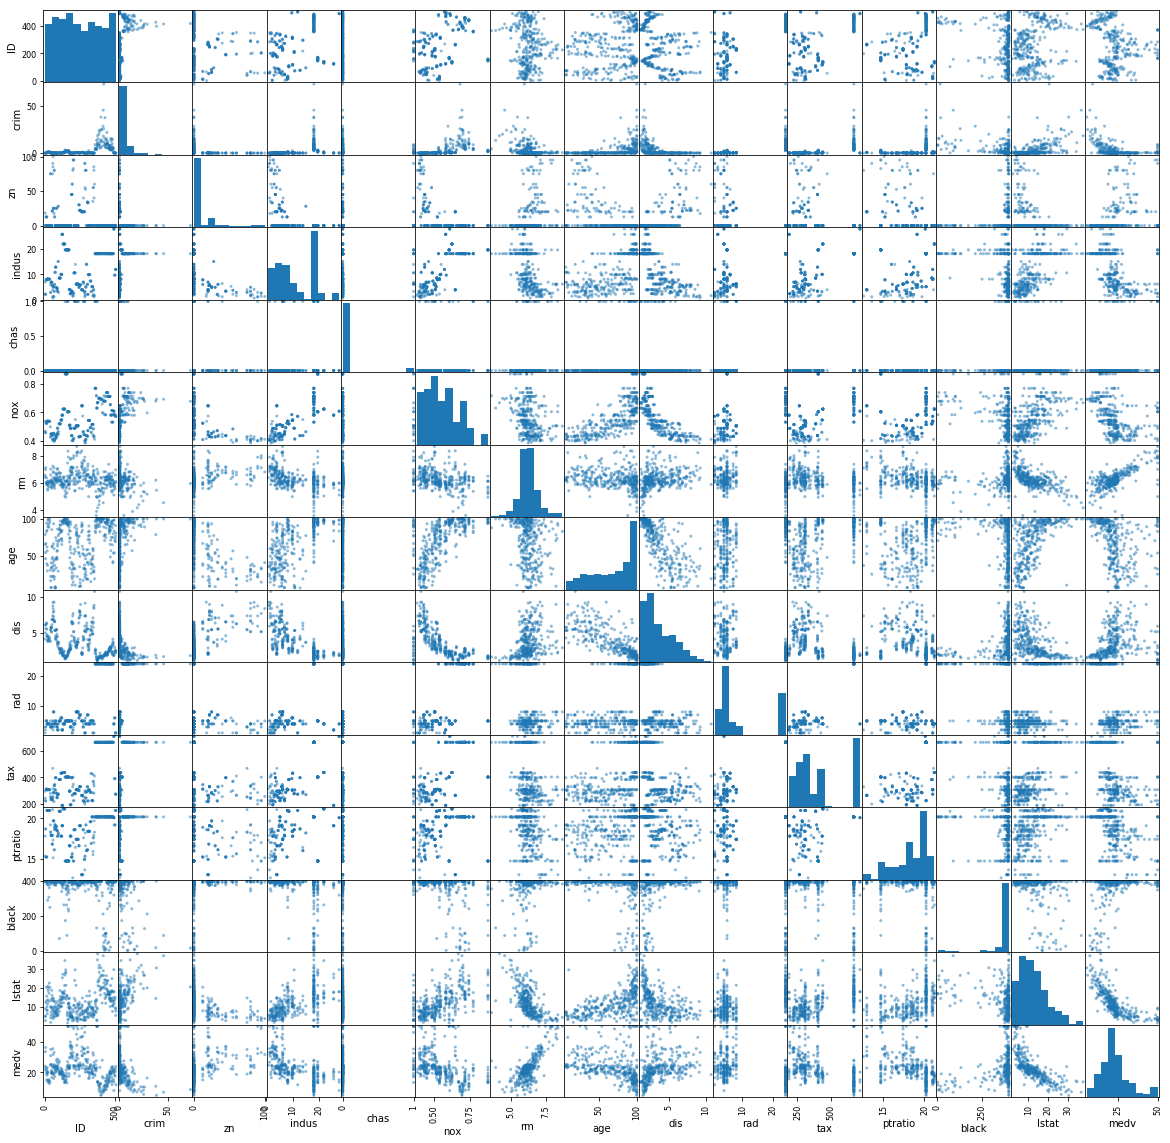

In [18]:
# Create meaningful subsets of the data.
pd.plotting.scatter_matrix(df, figsize=(20,20));

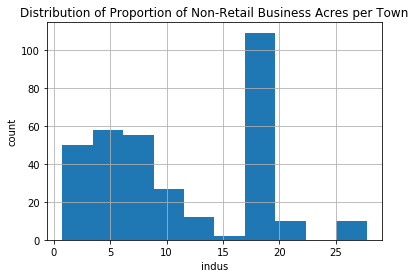

In [19]:
# Explain why you used the chosen subsets and do this for 3 possible 2-way splits. 
# State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. 

# SPLIT 1: indus - proportion of non-retail business acres per town.
df.indus.hist();
plt.title('Distribution of Proportion of Non-Retail Business Acres per Town')
plt.xlabel('indus')
plt.ylabel('count');

This subset variable was chosen because it appears to split many of the other variables in the dataset into two groups. 
There appears to be a separate category of town with a different trend that has many non-retail business acres per town, 
which is expressed by the the bimodal distribution in the histogram.
This can be seen in the `scatter_matrix` above.

The chosen subsets would split `indus` at 15. 
The measure of centrality for the lower set will be near 5.
The measure of centrality for the upper set will be near 20.
The measure of dispersion for the lower set will be much greater than upper set;
This can be seen by comparing the wide group on the left and the high peak on the right in the histogram.

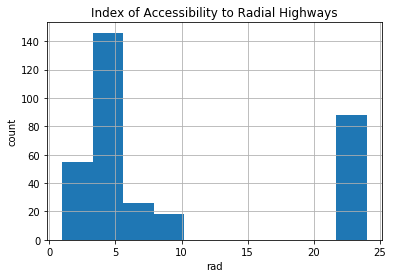

In [20]:
# SPLIT 2: rad - index of accessibility to radial highways.
df.rad.hist();
plt.title('Index of Accessibility to Radial Highways')
plt.xlabel('rad')
plt.ylabel('count');

This subset variable was chosen because it appears to split many of the other variables in the dataset into two groups. 
There appears to be a segment of houses in the dataset that are very far from radial highways, 
which is expressed by the the bimodal distribution in the histogram.
This can be seen in the `scatter_matrix` above.

The chosen subsets would split `rad` at 15. 
The measure of centrality for the lower set will be near 5.
The measure of centrality for the upper set will be near 23.
The measure of dispersion for the lower set will be much greater than upper set;
This can be seen by comparing the varied group on the left and the solitary peak on the right in the histogram.

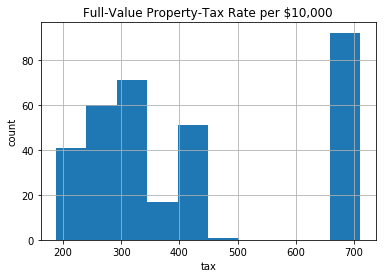

In [22]:
# SPLIT 3: tax - full-value property-tax rate per $10,000.
df.tax.hist();
plt.title('Full-Value Property-Tax Rate per $10,000')
plt.xlabel('tax')
plt.ylabel('count');

This subset variable was chosen because it appears to split many of the other variables in the dataset into two groups. 
There appears to be a segment of houses in the dataset that have approximately double the full-value property-tax rate per $10,000 than the rest, 
which is expressed by the the bimodal distribution in the histogram.
This can be seen in the `scatter_matrix` above.

The chosen subsets would split `tax` at 500. 
The measure of centrality for the lower set will be near 300.
The measure of centrality for the upper set will be near 700.
The measure of dispersion for the lower set will be much greater than upper set;
This can be seen by comparing the wide group on the left and the solitary peak on the right in the histogram.

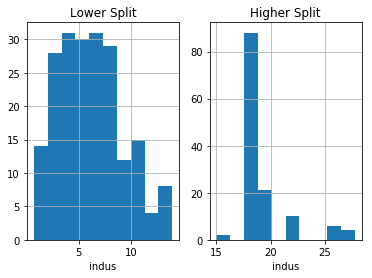

Top: Lower Split | Bottom: Higher Split


Text(0.5, 1.0, 'Higher Split')

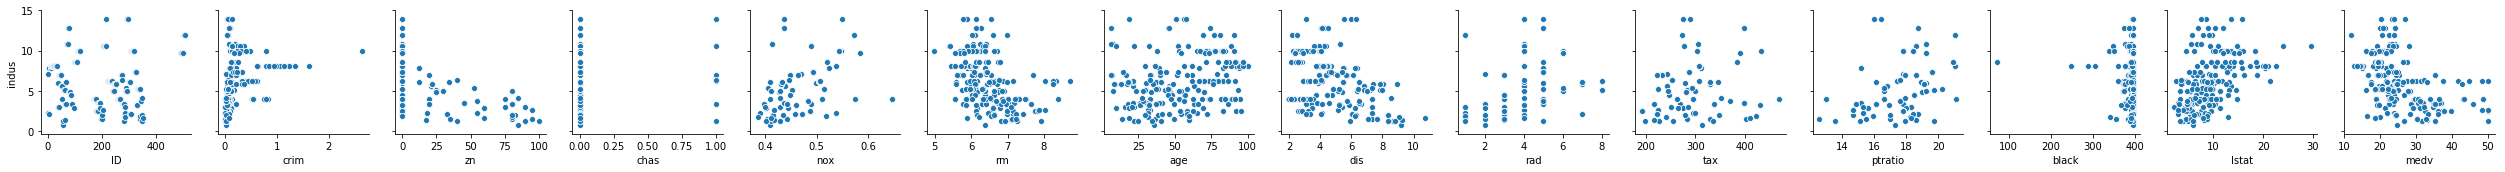

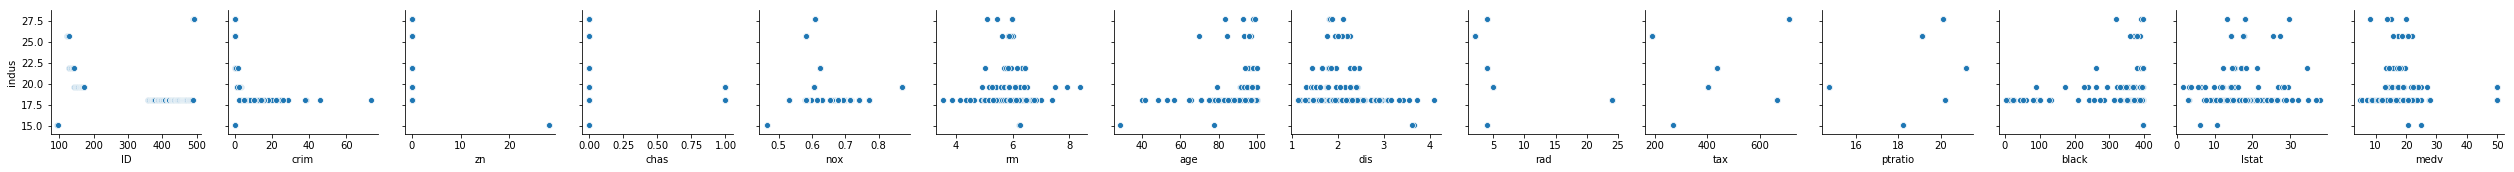

In [47]:
# Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. 

# SPLIT 1: indus - proportion of non-retail business acres per town.
df1_1 = df[df.indus < 15]
df1_2 = df[df.indus > 15]

# Histogram
fig, (ax1, ax2) = plt.subplots(1, 2)

df1_1.indus.hist(ax=ax1)
ax1.xaxis.set_label_text('indus')
ax1.set_title('Lower Split')

df1_2.indus.hist(ax=ax2)
ax2.xaxis.set_label_text('indus')
ax2.set_title('Higher Split')
plt.show()

# Scatterplot
print('Top: Lower Split | Bottom: Higher Split')
sns.pairplot(data=df1_1, y_vars=['indus'], x_vars=['ID', 'crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'])
ax3.set_title('Lower Split')

sns.pairplot(data=df1_2, y_vars=['indus'], x_vars=['ID', 'crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'])
ax3.set_title('Higher Split')

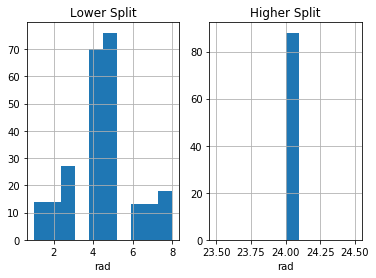

Top: Lower Split | Bottom: Higher Split


Text(0.5, 1.0, 'Higher Split')

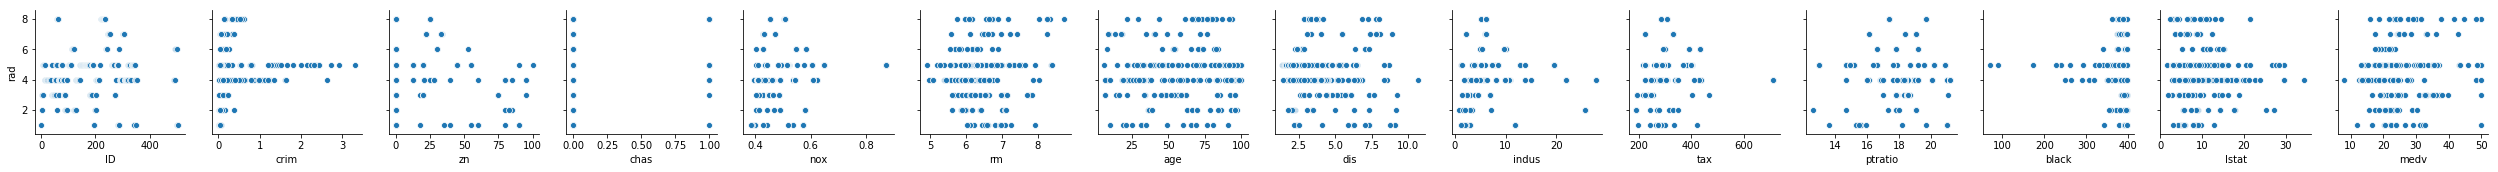

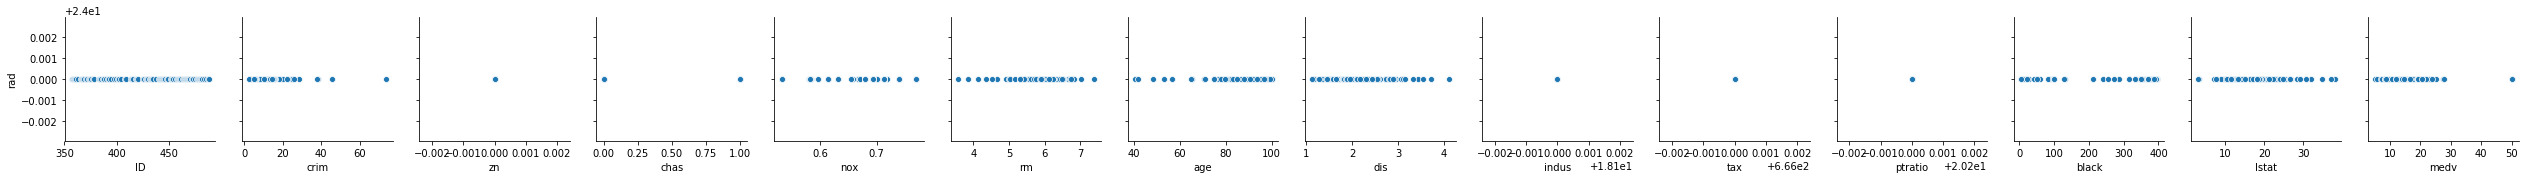

In [48]:
# SPLIT 2: rad - index of accessibility to radial highways.
df2_1 = df[df.rad < 15]
df2_2 = df[df.rad > 15]

# Histogram
fig, (ax1, ax2) = plt.subplots(1, 2)

df2_1.rad.hist(ax=ax1)
ax1.xaxis.set_label_text('rad')
ax1.set_title('Lower Split')

df2_2.rad.hist(ax=ax2)
ax2.xaxis.set_label_text('rad')
ax2.set_title('Higher Split')
plt.show()

# Scatterplot
print('Top: Lower Split | Bottom: Higher Split')
sns.pairplot(data=df2_1, y_vars=['rad'], x_vars=['ID', 'crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'indus',
       'tax', 'ptratio', 'black', 'lstat', 'medv'])
ax3.set_title('Lower Split')

sns.pairplot(data=df2_2, y_vars=['rad'], x_vars=['ID', 'crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'indus',
       'tax', 'ptratio', 'black', 'lstat', 'medv'])
ax3.set_title('Higher Split')

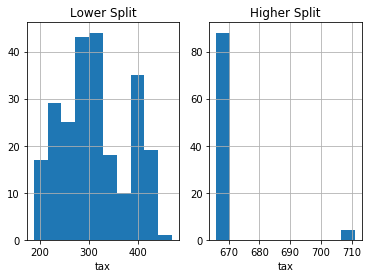

Top: Lower Split | Bottom: Higher Split


Text(0.5, 1.0, 'Higher Split')

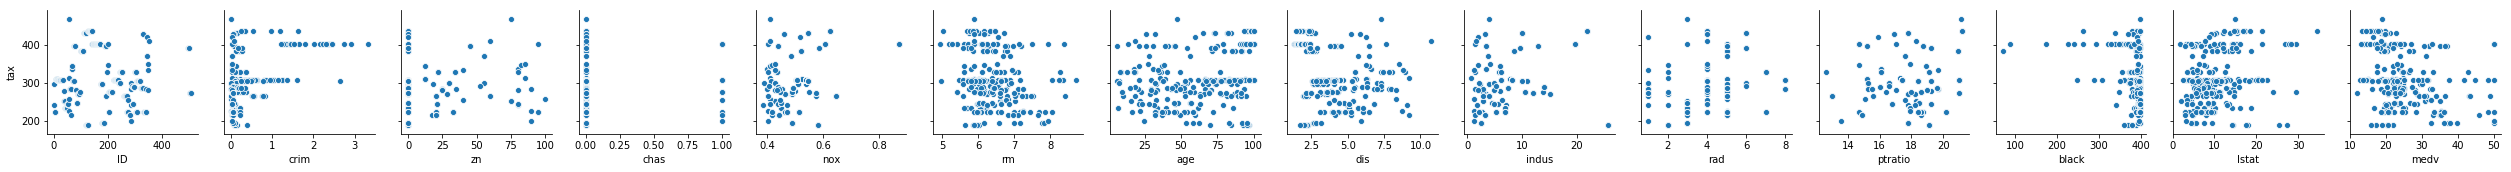

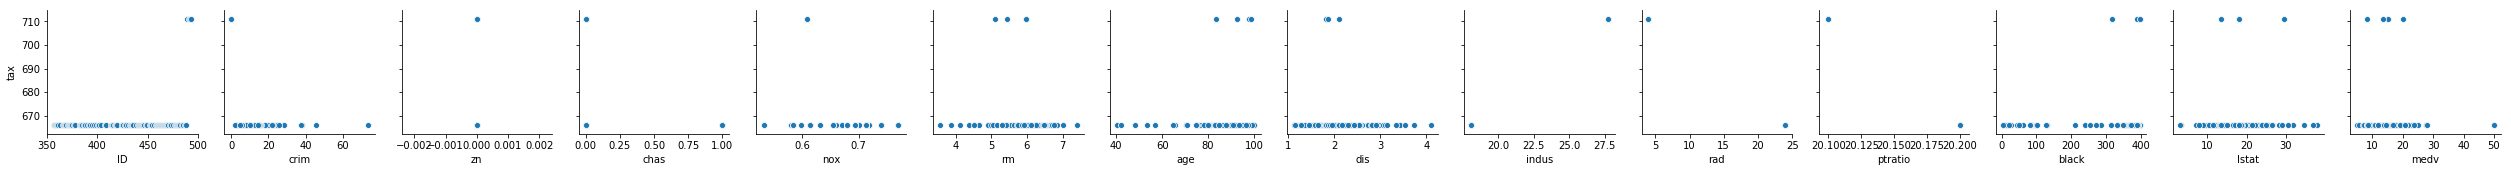

In [50]:
# SPLIT 3: tax - full-value property-tax rate per $10,000.
df3_1 = df[df.tax < 500]
df3_2 = df[df.tax > 500]

# Histogram
fig, (ax1, ax2) = plt.subplots(1, 2)

df3_1.tax.hist(ax=ax1)
ax1.xaxis.set_label_text('tax')
ax1.set_title('Lower Split')

df3_2.tax.hist(ax=ax2)
ax2.xaxis.set_label_text('tax')
ax2.set_title('Higher Split')
plt.show()

# Scatterplot
print('Top: Lower Split | Bottom: Higher Split')
sns.pairplot(data=df3_1, y_vars=['tax'], x_vars=['ID', 'crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'indus',
       'rad', 'ptratio', 'black', 'lstat', 'medv'])
ax3.set_title('Lower Split')

sns.pairplot(data=df3_2, y_vars=['tax'], x_vars=['ID', 'crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'indus',
       'rad', 'ptratio', 'black', 'lstat', 'medv'])
ax3.set_title('Higher Split')

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular data set!